In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading and Understanding the data

df=pd.read_csv(r"C:\Users\Rajita\Downloads\archive (1)\Mall_Customers.csv")

In [4]:
# Inspecting first five rows

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Rename column Genre to Gender

df.rename(columns = {'Genre':'Gender'}, inplace = True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Statistical Summary of the dataset

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# drop CustomerID column

df.drop('CustomerID',axis=1,inplace=True)

In [10]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Univariate Analysis

In [12]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<Axes: title={'center': 'Genre Distribution plot'}, ylabel='Gender'>

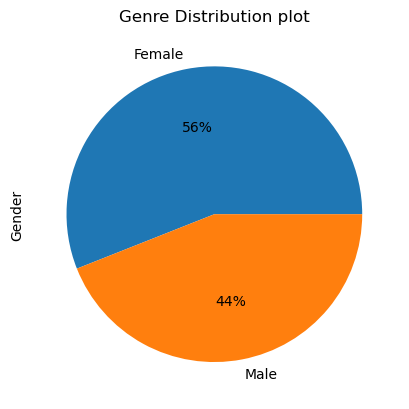

In [13]:
df['Gender'].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%',title='Genre Distribution plot')

Ration of Female customers is more as compared to Male Customers

<Axes: xlabel='Age', ylabel='Count'>

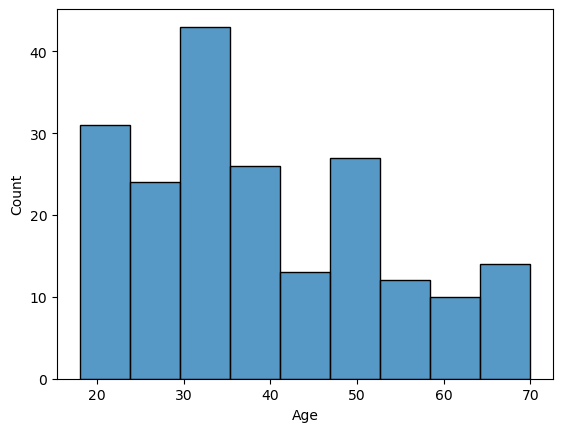

In [14]:
sns.histplot(df['Age'])

<Axes: title={'center': 'Age Distribution plot'}, ylabel='Density'>

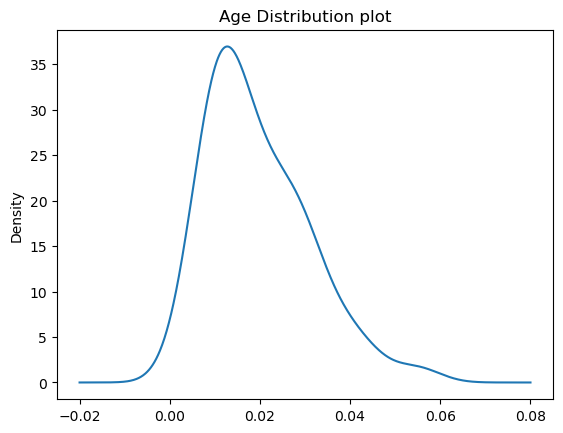

In [15]:
df['Age'].value_counts(normalize=True).plot(kind='kde', title='Age Distribution plot')

Customers visiting mall falls betwween the age group of 20 to 50 yrs. Avg age is 38 yrs and it is right skwewd data.

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

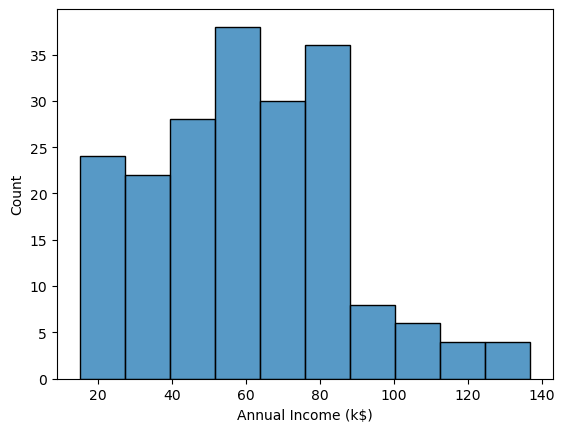

In [16]:
sns.histplot(df['Annual Income (k$)'])

<Axes: title={'center': 'Annuall Income Distribution plot'}, ylabel='Density'>

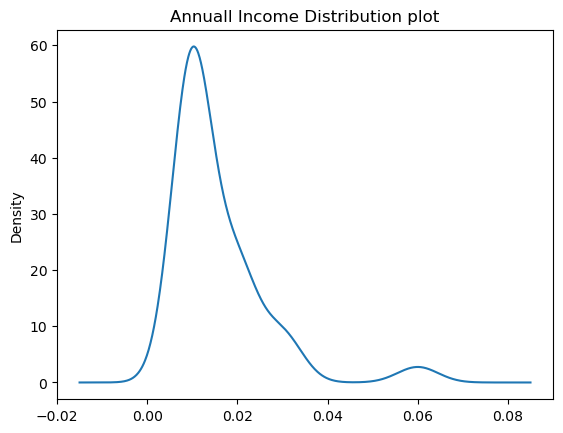

In [17]:
df['Annual Income (k$)'].value_counts(normalize=True).plot(kind='kde',title='Annuall Income Distribution plot')

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

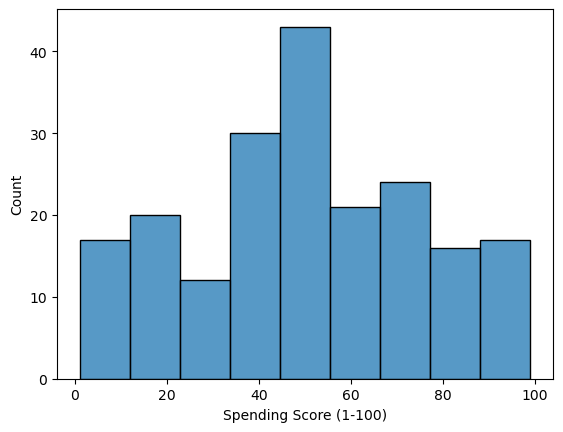

In [29]:
sns.histplot(df['Spending Score (1-100)'])

<Axes: title={'center': 'Spending Score Distribution plot'}, ylabel='Density'>

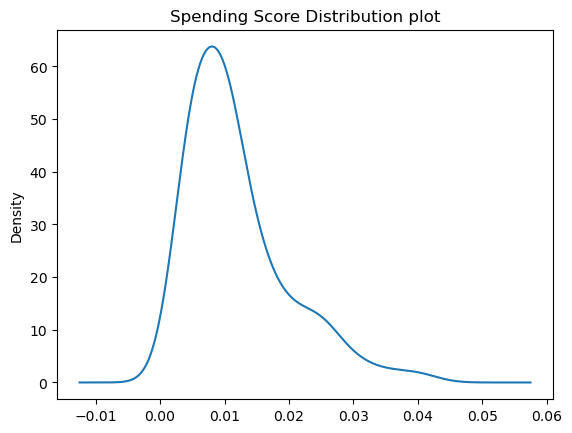

In [31]:
df['Spending Score (1-100)'].value_counts(normalize=True).plot(kind='kde',title='Spending Score Distribution plot')

## Bivariate Analysis

<Axes: xlabel='Genre', ylabel='Age'>

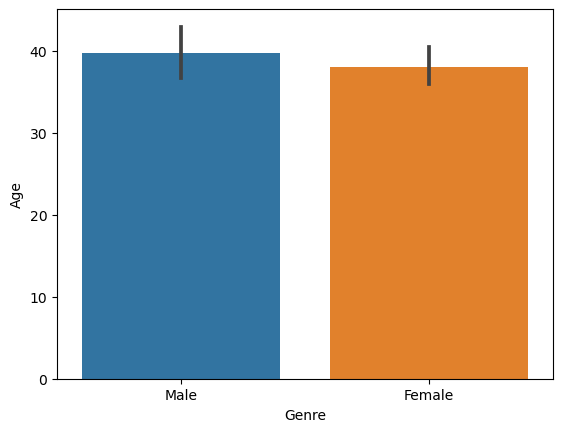

In [26]:
sns.barplot(x='Genre',y='Age',data=df)

<Axes: title={'center': 'Annual Income vs Age'}, xlabel='Annual Income (k$)', ylabel='Age'>

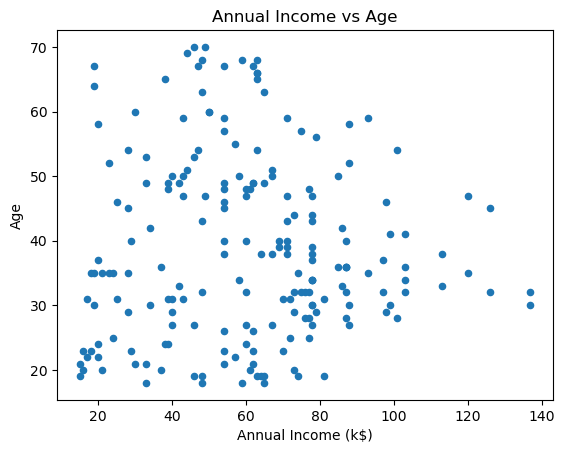

In [39]:
df.plot(kind='scatter', x='Annual Income (k$)', y='Age',title='Annual Income vs Age')

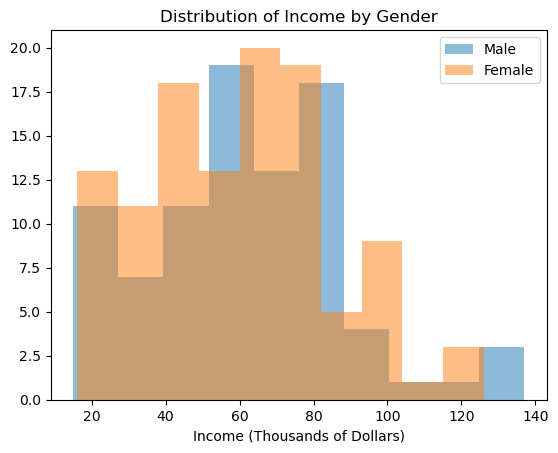

In [44]:
# Histogram of income by gender
plt.hist('Annual Income (k$)', data=df[df['Genre'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=df[df['Genre'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.legend();

<Axes: title={'center': 'Annual Income vs Spending Score'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

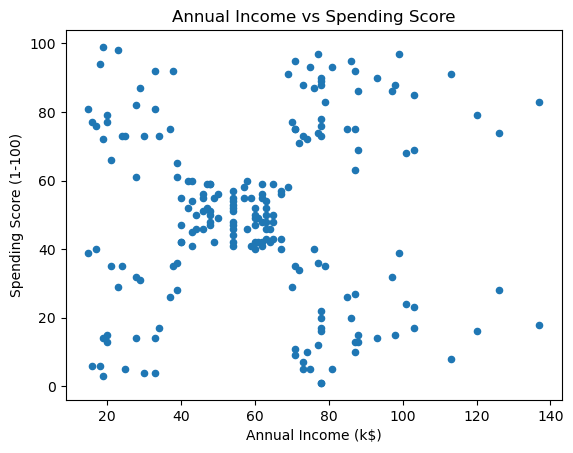

In [40]:
df.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)',title='Annual Income vs Spending Score')

Here we can clearly see some patterns like
1. Low Income and Low Spending
2. Low Income and High Spending
3. Medium Income and Medium Spending
4. High Income and Low Spending
5. High Income and High Spending

In [20]:
# Create data sets by gender to save time in the future since gender seems to significantly impact other variables
male_customers = df[df['Gender'] == 'Male']
female_customers = df[df['Gender'] == 'Female']

# Print the average spending score for men and women
print("Average Spending Score of Male customer is ", male_customers['Spending Score (1-100)'].mean())
print("Average Spending Score of Female customer is ",female_customers['Spending Score (1-100)'].mean())

Average Spending Score of Male customer is  48.51136363636363
Average Spending Score of Female customer is  51.526785714285715


Female customers spends more as compared to Male customers

## Multivariate Analysis




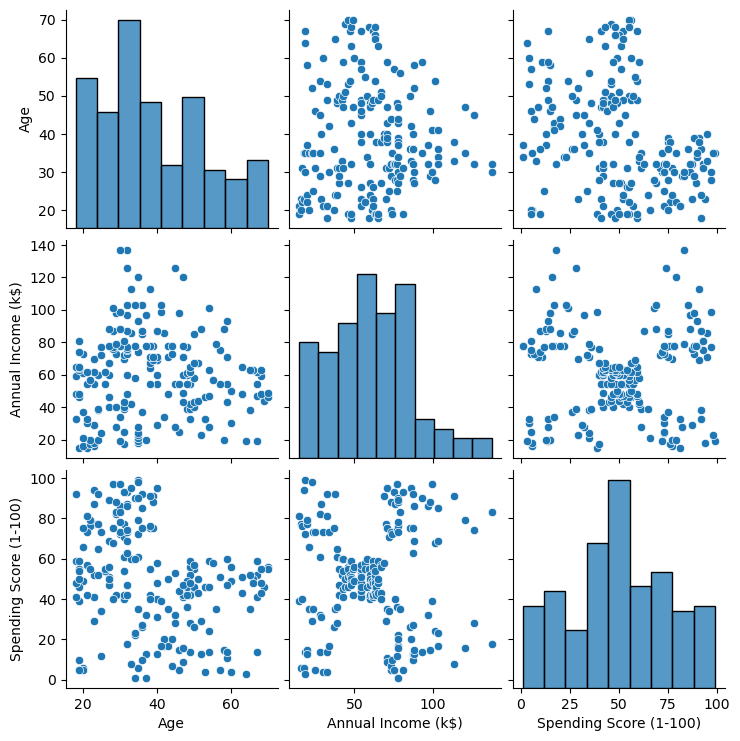

In [45]:
sns.pairplot(df)

In [47]:
df_corr=df.corr()
df_corr

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

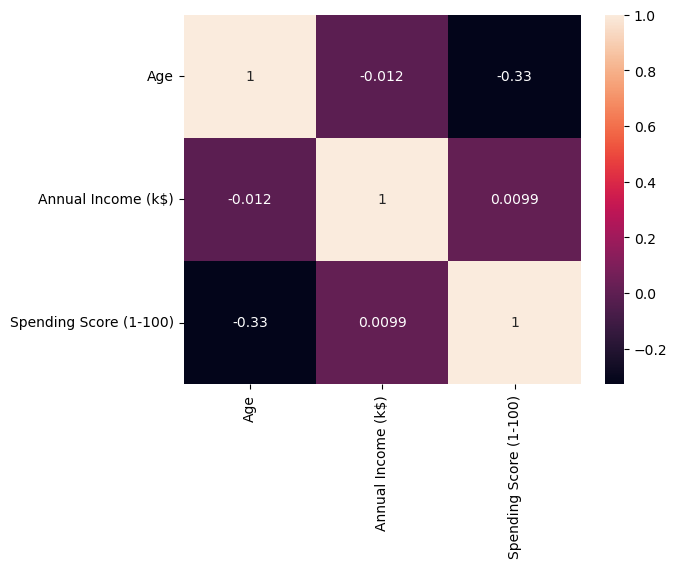

In [49]:
sns.heatmap(df_corr,annot=True)

As we see their is no correlation between any features.